<a href="https://colab.research.google.com/github/JeanMusenga/PhD-Thesis_2024_Musenga/blob/main/TextCNN_with_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important sorces:
https://chatgpt.com/share/21220a6d-4cca-48bc-b461-bca6b0e140bc

In [ ]:
pip install gensim

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
file_path = './saved_file'
file_path = ('posts.xlsx')
arp_data = pd.read_excel(file_path)

In [14]:
class_distribution = arp_data['Label'].value_counts()
print(class_distribution)

Label
1    7466
0    7466
Name: count, dtype: int64


In [15]:
# Parameters
max_len = 100  # Maximum length of all sequences

In [16]:
# Extract the text and labels
texts = arp_data['Question_body'].astype(str).tolist()
labels = arp_data['Label'].tolist()

# Tokenize the text and train Word2Vec model

In [17]:
# Tokenize the text and train Word2Vec model
tokenized_texts = [text.split() for text in texts]
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)


# Create an embedding matrix

In [18]:
# Create an embedding matrix
vocab_size = len(word2vec_model.wv.key_to_index) + 1
embedding_dim = word2vec_model.vector_size
embedding_matrix = np.zeros((vocab_size, embedding_dim))

word_index = {word: index for index, word in enumerate(word2vec_model.wv.index_to_key, 1)}

for word, index in word_index.items():
    embedding_matrix[index] = word2vec_model.wv[word]

# Convert text to sequences of word indexes

In [19]:
# Convert text to sequences of word indexes
sequences = [[word_index.get(word, 0) for word in text] for text in tokenized_texts]


# Pad the sequences to ensure uniform input size

In [20]:
# Pad the sequences to ensure uniform input size
data = pad_sequences(sequences, maxlen=max_len)

# Convert labels to numpy array

In [21]:
# Convert labels to numpy array
labels = tf.keras.utils.to_categorical(labels, num_classes=2)

# Split the data into training and testing sets

In [22]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)


# Define the neural network model

In [23]:
# Define the neural network model
def create_model(vocab_size, embedding_dim, input_length, embedding_matrix):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=vocab_size,
                                  output_dim=embedding_dim,
                                  weights=[embedding_matrix],
                                  input_length=input_length,
                                  trainable=False),
        tf.keras.layers.Conv1D(128, 5, activation='relu'),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model

In [24]:
# Create the model
model = create_model(vocab_size, embedding_dim, max_len, embedding_matrix)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# Train the model

In [25]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8444 - loss: 0.4400 - val_accuracy: 0.8862 - val_loss: 0.2919
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9041 - loss: 0.2324 - val_accuracy: 0.8871 - val_loss: 0.3143
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9243 - loss: 0.1882 - val_accuracy: 0.8876 - val_loss: 0.3318
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9342 - loss: 0.1608 - val_accuracy: 0.8910 - val_loss: 0.2956
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9539 - loss: 0.1195 - val_accuracy: 0.8886 - val_loss: 0.2994
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9693 - loss: 0.0872 - val_accuracy: 0.8914 - val_loss: 0.3546
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.0901 - val_accuracy: 0.8833 - val_loss: 0.3804
Epoch 8/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.0787 - val_accuracy: 0

# Evaluate the model

In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4743
Test Accuracy: 0.8455


# Make predictions

In [5]:
# Make predictions and convert to class labels
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)


NameError: name 'model' is not defined

In [33]:
# Calculate precision, recall, and F1-score
report = classification_report(y_true_classes, y_pred_classes, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.81      0.90      0.86      2265
     Class 1       0.89      0.79      0.83      2215

    accuracy                           0.85      4480
   macro avg       0.85      0.84      0.84      4480
weighted avg       0.85      0.85      0.84      4480



In [34]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Calculate precision, recall, f1-score, and support
precision_class, recall_class, f1_class, support_class = precision_recall_fscore_support(y_true_classes, y_pred_classes, average=None)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Calculate class-wise accuracy
accuracy_class_0 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
accuracy_class_1 = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) if (conf_matrix[1, 1] + conf_matrix[1, 0]) > 0 else 0

# Compute overall accuracy
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()

# Print metrics
print(f'Class 0 - Precision: {precision_class[0]:.4f}, Recall: {recall_class[0]:.4f}, F1-score: {f1_class[0]:.4f}, Support: {support_class[0]}, Accuracy: {accuracy_class_0:.4f}')
print(f'Class 1 - Precision: {precision_class[1]:.4f}, Recall: {recall_class[1]:.4f}, F1-score: {f1_class[1]:.4f}, Support: {support_class[1]}, Accuracy: {accuracy_class_1:.4f}')
print(f'Overall Accuracy: {accuracy:.4f}')


Class 0 - Precision: 0.8122, Recall: 0.9033, F1-score: 0.8554, Support: 2265, Accuracy: 0.9033
Class 1 - Precision: 0.8883, Recall: 0.7865, F1-score: 0.8343, Support: 2215, Accuracy: 0.7865
Overall Accuracy: 0.8455


In [35]:
# Save the model
model.save('word2vec_textcnn_model.h5')

# Prediction results analysis with Confusion Matric

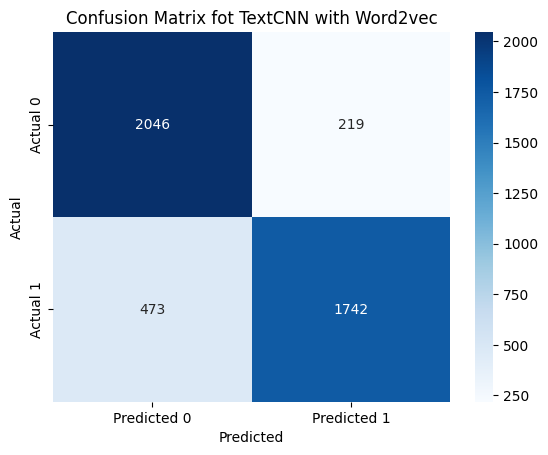

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_test is in binary format
y_true_classes = y_test.argmax(axis=1)  # Convert y_test to binary labels

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix fot TextCNN with Word2vec')
plt.show()


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities (instead of classes) for the positive class
y_pred_prob = model.predict(X_test_padded).ravel()

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'model' is not defined